<a href="https://colab.research.google.com/github/JaredDRodriguez/Notebook_PDI_LAB/blob/main/Actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensiones de la imagen: 611x411, Canales: 3
Área del objeto segmentado: 18200 píxeles


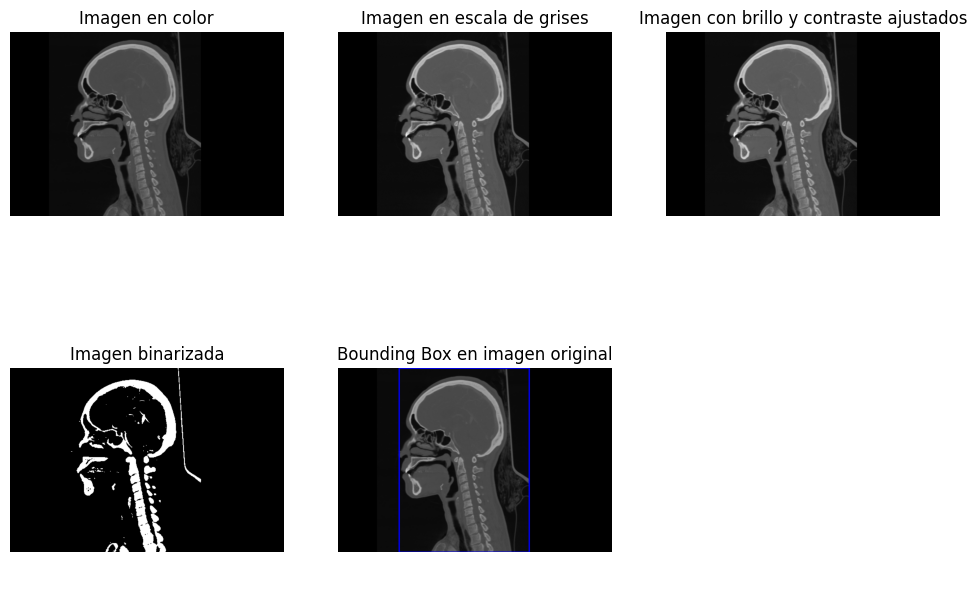

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, threshold_value=127):
    # Cargar imagen en color y en escala de grises
    img_color = cv2.imread(image_path)
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Obtener dimensiones de la imagen
    height, width, channels = img_color.shape
    print(f"Dimensiones de la imagen: {width}x{height}, Canales: {channels}")

    # Ajustar brillo y contraste (contraste al máximo y brillo al 175%)
    alpha = 1.0  # Contraste máximo
    beta = 50   # Brillo al 175%
    img_adj = cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)

    # Aplicar umbralización binaria
    _, img_bin = cv2.threshold(img_adj, threshold_value, 255, cv2.THRESH_BINARY)

    # Separar los canales de la imagen RGB
    b, g, r = cv2.split(img_color)

    # Obtener el área del objeto segmentado
    area = np.count_nonzero(img_bin)
    print(f"Área del objeto segmentado: {area} píxeles")

    # Extraer bounding box del objeto segmentado
    x, y, w, h = cv2.boundingRect(img_bin)

    # Dibujar bounding box en la imagen a color
    img_bounding = img_color.copy()
    cv2.rectangle(img_bounding, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Mostrar imágenes
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    axs[0, 0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title("Imagen en color")
    axs[0, 1].imshow(img_gray, cmap='gray')
    axs[0, 1].set_title("Imagen en escala de grises")
    axs[0, 2].imshow(img_adj, cmap='gray')
    axs[0, 2].set_title("Imagen con brillo y contraste ajustados")
    axs[1, 0].imshow(img_bin, cmap='gray')
    axs[1, 0].set_title("Imagen binarizada")
    axs[1, 1].imshow(cv2.cvtColor(img_bounding, cv2.COLOR_BGR2RGB))
    axs[1, 1].set_title("Bounding Box en imagen original")

    for ax in axs.flat:
        ax.axis("off")

    plt.show()

# Ruta de la imagen
image_path = "/Tac_Craneo.png"  # Reemplaza con la ruta de tu imagen
process_image(image_path)
